In [1]:
## Import libraries
from dataloader import Dataset
from model_square_images import CNNSquareImages
from model_unmodified_images import CNNUntouchedImages

import torch
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import time
from sklearn import metrics

In [2]:
## Hyperparameters
batch_size_train = 32
batch_size_test = 42
learning_rate = 1e-3
epochs = 500

In [3]:
## Define used device
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f'Using {device}')

Using cuda


In [4]:
## Import images (inputs for the CNNs)
_train_tensor_52x600 = torch.load('tensors/train_tensors_52x600.pt')
_train_labels_52x600 = torch.load('tensors/train_labels_52x600.pt')
_test_tensor_52x600 = torch.load('tensors/test_tensors_52x600.pt')
_test_labels_52x600 = torch.load('tensors/test_labels_52x600.pt')

_train_tensor_64x64 = torch.load('tensors/train_tensors_64x64.pt')
_train_labels_64x64 = torch.load('tensors/train_labels_64x64.pt')
_test_tensor_64x64 = torch.load('tensors/test_tensors_64x64.pt')
_test_labels_64x64 = torch.load('tensors/test_labels_64x64.pt')

In [5]:
# Images 52 x 600
train_dataset_52x600 = Dataset(torch.stack(_train_tensor_52x600, dim = 0).unsqueeze(1), _train_labels_52x600)
test_dataset_52x600 = Dataset(torch.stack(_test_tensor_52x600, dim = 0).unsqueeze(1), _test_labels_52x600)

train_loader_52x600 = DataLoader(train_dataset_52x600, batch_size = batch_size_train, shuffle = True)
test_loader_52x600 = DataLoader(test_dataset_52x600, batch_size = batch_size_test, shuffle = True)

# Images 64 x 64
train_dataset_64x64 = Dataset(torch.stack(_train_tensor_64x64, dim = 0).unsqueeze(1), _train_labels_64x64)
test_dataset_64x64 = Dataset(torch.stack(_test_tensor_64x64, dim = 0).unsqueeze(1), _test_labels_64x64)

train_loader_64x64 = DataLoader(train_dataset_64x64, batch_size = batch_size_train, shuffle = True)
test_loader_64x64 = DataLoader(test_dataset_64x64, batch_size = batch_size_test, shuffle = True)

In [6]:
## Import and initialize models
model_52x600 = CNNUntouchedImages().to(device)
model_64x64 = CNNSquareImages().to(device)

In [7]:
# Criterions and optimizers
criterion_52x600 = nn.CrossEntropyLoss()
optimizer_52x600 = optim.Adam(model_52x600.parameters(), lr = learning_rate)

criterion_64x64 = nn.CrossEntropyLoss()
optimizer_64x64 = optim.Adam(model_64x64.parameters(), lr = learning_rate)

In [8]:
# Train the 52x600 model
losses_52x600 = []
print(f'Training the 52x600 CNN')
_time = time.time()
for epoch in range(epochs):
    # print(f'Epoch [{epoch+1}/{epochs}]', end = ' ')
    
    for batch_x, batch_y in train_loader_52x600:
        batch_x = batch_x.to(device)
        batch_y = batch_y.to(device)

        optimizer_52x600.zero_grad()
        scores = model_52x600(batch_x)
        loss = criterion_52x600(scores, batch_y)
        loss.backward()
        optimizer_52x600.step()
    
    losses_52x600.append(loss.item())
    # print(f'Loss : {loss.item()}')

print(f'Training time : {round(time.time() - _time, 2)}s')

Training the 52x600 CNN
Training time : 32.31s


In [9]:
# Train the 64x64 model
losses_64x64 = []
print(f'Training the 64x64 CNN')
_time = time.time()
for epoch in range(epochs):
    # print(f'Epoch [{epoch+1}/{epochs}]', end = ' ')
    
    for batch_x, batch_y in train_loader_64x64:
        batch_x = batch_x.to(device)
        batch_y = batch_y.to(device)

        optimizer_64x64.zero_grad()
        scores = model_64x64(batch_x)
        loss = criterion_64x64(scores, batch_y)
        loss.backward()
        optimizer_64x64.step()

    losses_64x64.append(loss.item())
    # print(f'Loss : {loss.item()}')

print(f'Training time : {round(time.time() - _time, 2)}s')

Training the 64x64 CNN
Training time : 15.29s


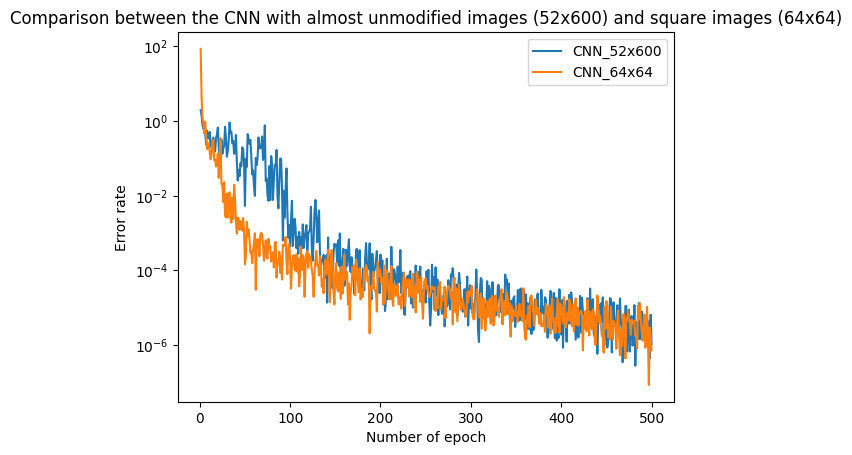

In [10]:
## Plot the losses of each model
plt.semilogy([_+1 for _ in range(epochs)], losses_52x600, [_+1 for _ in range(epochs)], losses_64x64)
plt.xlabel('Number of epoch')
plt.ylabel('Error rate')
plt.title('Comparison between the CNN with almost unmodified images (52x600) and square images (64x64)')
plt.legend(['CNN_52x600', 'CNN_64x64'])
plt.show()

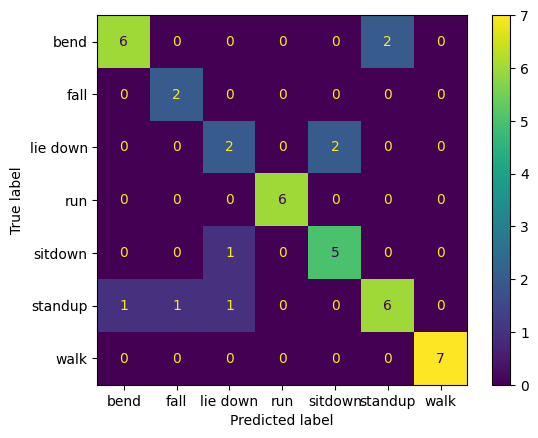

CNN_52x600 accuracy : 80.95


In [18]:
# Evaluate the 52x600 CNN
model_52x600.eval()
correct, total = 0, 0

with torch.no_grad():
    inputs = test_dataset_52x600.x.to(device)
    targets = test_dataset_52x600.y.to(device)
    
    outputs = model_52x600(inputs)
    _, predicted = torch.max(outputs, dim = 1)

    total = targets.size(0)
    correct = (predicted == targets).sum().item()

    confusion = metrics.confusion_matrix(predicted.cpu(), targets.cpu())
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion, display_labels = ['bend', 'fall', 'lie down', 'run', 'sitdown', 'standup', 'walk'])
    cm_display.plot()
    plt.show()

accuracy = 100 * correct / total
print(f'CNN_52x600 accuracy : {accuracy:.2f}')

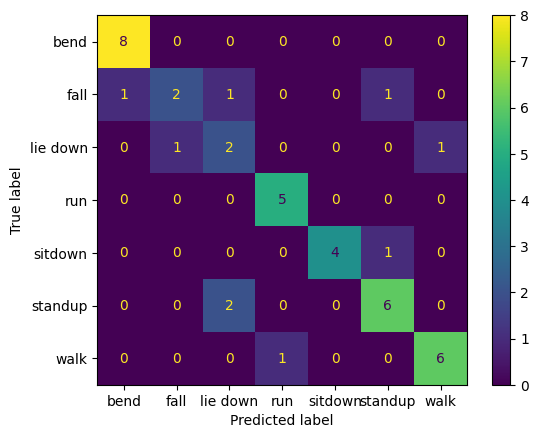

CNN_64x64 accuracy : 78.57


In [19]:
# Evaluate the 64x64 CNN
model_64x64.eval()
correct, total = 0, 0

with torch.no_grad():
    inputs = test_dataset_64x64.x.to(device)
    targets = test_dataset_64x64.y.to(device)
    
    outputs = model_64x64(inputs)
    _, predicted = torch.max(outputs, dim = 1)

    total = targets.size(0)
    correct = (predicted == targets).sum().item()

    confusion = metrics.confusion_matrix(predicted.cpu(), targets.cpu())
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion, display_labels = ['bend', 'fall', 'lie down', 'run', 'sitdown', 'standup', 'walk'])
    cm_display.plot()
    plt.show()

accuracy = 100 * correct / total
print(f'CNN_64x64 accuracy : {accuracy:.2f}')